# Importing required modulues 

In [105]:
import pandas as pd


In [172]:
stations=['Battle Creek','Big Rapids','East Jordan','Houghton Lake','Kent City','Lake City','South Haven','Wellston']
snow=pd.read_excel("snowfall.xlsx",sheetname=stations,index_col='Year')
snow=pd.concat(snow,axis=1)
snow.columns=stations
snow=snow[snow.index>1949]
snow.head(10)

,Battle Creek,Big Rapids,East Jordan,Houghton Lake,Kent City,Lake City,South Haven,Wellston
Year,,,,,,,,
1950,NaN,68.1,NaN,50.8,NaN,90.0,NaN,91.0
1951,42.6,73.0,NaN,70.3,35.1,NaN,53.7,103.5
1952,76.8,115.3,NaN,NaN,65.0,112.6,78.1,109.5
1953,27.0,41.5,NaN,36.5,NaN,70.3,NaN,85.3
1954,44.9,50.3,NaN,41.7,52.2,68.5,67.5,57.3
1955,37.5,36.1,79.0,NaN,44.4,79.0,42.5,70.2
1956,43.0,65.6,90.5,71.2,61.4,88.5,55.5,94.4
1957,36.9,49.3,77.5,NaN,49.6,NaN,48.5,NaN
1958,40.4,51.2,58.0,42.3,47.6,NaN,60.2,71.8


In [173]:
snow.describe()



,Battle Creek,Big Rapids,East Jordan,Houghton Lake,Kent City,Lake City,South Haven,Wellston
count,64.000000,65.000000,55.000000,51.000000,60.000000,53.000000,57.000000,63.000000
mean,54.784375,65.361538,109.080000,57.605882,52.930000,77.018868,63.442105,94.158730
std,19.299784,20.890381,31.524367,17.135185,14.111449,19.127317,22.904132,24.236999
min,27.000000,25.800000,25.300000,26.000000,17.100000,38.000000,17.500000,42.600000
25%,41.000000,50.300000,88.150000,42.700000,44.475000,61.500000,48.900000,74.250000
50%,49.000000,64.600000,107.600000,54.400000,53.100000,79.000000,64.000000,93.300000
75%,64.600000,79.300000,132.300000,70.700000,62.000000,89.500000,75.500000,109.250000
max,109.600000,115.300000,183.400000,107.400000,83.000000,126.900000,113.700000,156.200000


In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Text(0.5,0,'Stations')

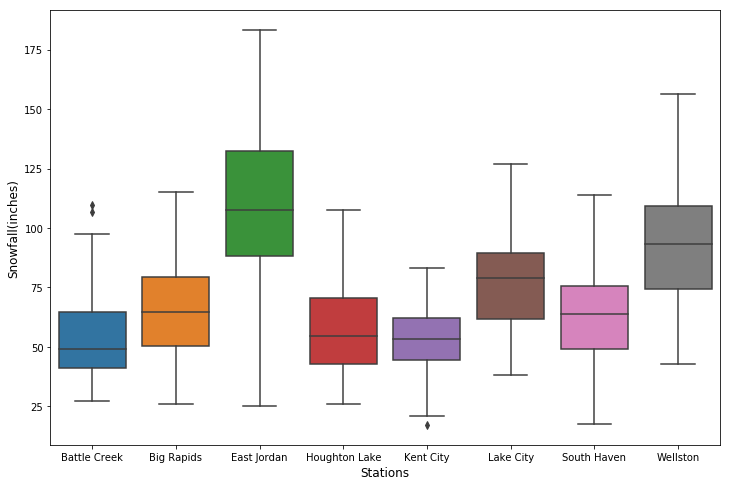

In [175]:
plt.figure(figsize=(12,8))
sns.boxplot(data=snow)
#plt.title("Snowfall distribution at stations",size=12)
plt.ylabel("Snowfall(inches)",size=12)
plt.xlabel("Stations",size=12)

# Latitude effect

In [177]:
lat=pd.Series([42.22,43.71,45.15,44.19,43.12,44.31,42.24,44.15],index=snow.columns)

new=pd.concat([snow.mean(),lat],axis=1)
new.columns=['Mean Snowfall','Latitude']


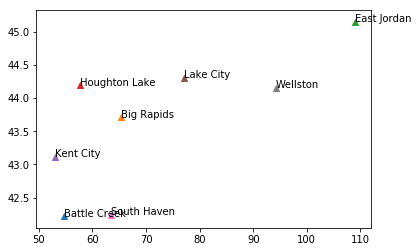

In [178]:
for i in range(len(stations)):
    plt.scatter(new['Mean Snowfall'][i],new['Latitude'][i],marker='^')
    plt.annotate(stations[i],(new['Mean Snowfall'][i],new['Latitude'][i]))

plt.show()

# Air Temperature over LPM

In [180]:

def func(station):
    temp= pd.read_table('temp_over stations/'+str(station)+'.txt',sep='\s+',usecols=[0,3])#,index_col=0)
    temp=temp[['Year','T(C)']]
    #temp=temp.set_index('Year')
    return temp

temp=func('bigrapids')

temp.head()

,Year,T(C)
0,1932,-0.5222
1,1933,-1.9779
2,1934,-4.5995
3,1935,-3.0571
4,1936,-5.3248


# mankandall test

In [145]:
# mankandall test
from scipy.stats import norm, mstats


def mk_test(x, alpha = 0.05):  
    """   
    Input:
        x:   a vector of data
        alpha: significance level (0.05 default)

    Output:
        trend: tells the trend (increasing, decreasing or no trend)
        h: True (if trend is present) or False (if trend is absence)
        p: p value of the significance test
        z: normalized test statistics 

    Examples
    --------
      >>> x = np.random.rand(100)
      >>> trend,h,p,z = mk_test(x,0.05) 
    """
    n = len(x)

    # calculate S 
    s = 0
    for k in range(n-1):
        for j in range(k+1,n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x = np.unique(x)
    g = len(unique_x)

    # calculate the var(s)
    if n == g: # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else: # there are some ties in data
        tp = np.zeros(unique_x.shape)
        for i in range(len(unique_x)):
            tp[i] = sum(unique_x[i] == x)
        var_s = (n*(n-1)*(2*n+5) + np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s>0:
        z = (s - 1)/np.sqrt(var_s)
    elif s == 0:
            z = 0
    elif s<0:
        z = (s + 1)/np.sqrt(var_s)

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z))) # two tail test
    h = abs(z) > norm.ppf(1-alpha/2) 

    if (z<0) and h:
        trend = 'decreasing'
    elif (z>0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, h, p, z


Text(0,0.5,'Temperature(C)')

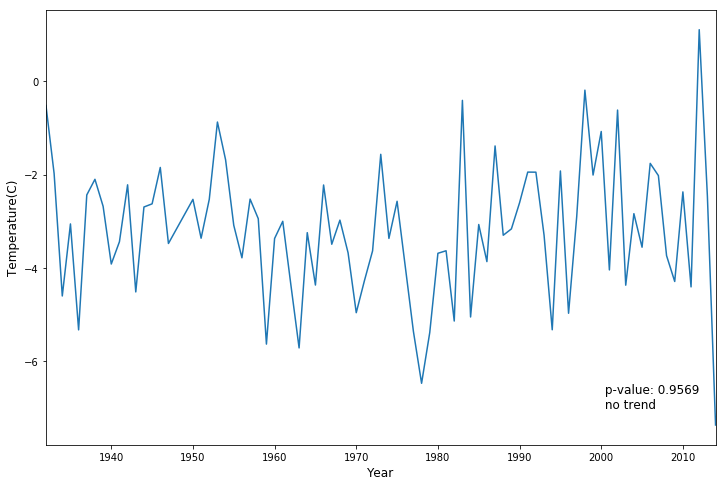

In [181]:
trend,h,p,z=mk_test(temp['T(C)'].tolist(),alpha=0.1)
temp.plot(x='Year',y='T(C)',figsize=(12,8),legend=False)
plt.text(2000, -7,' p-value: {}\n {}'.format(round(p,4),trend),size=12)
plt.xlabel('Year',size=12)
plt.ylabel('Temperature(C)',size=12)



# Maximum Ice Coverage

In [182]:
IC=pd.read_excel('1963-2015 ice cover.xlsx').set_index('Year')

temp=data[temp['Year']>1962].set_index('Year')
IC.head()

,Max_ice_cover_percentage
Year,
1963,75.581395
1964,15.116279
1965,39.534884
1966,16.279070
1967,45.348837


In [188]:
temp.columns=['Air temperature(C)']
temp.head()

,Air temperature(C)
Year,
1963,-5.7113
1964,-3.2440
1965,-4.3654
1966,-2.2236
1967,-3.4920


https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html

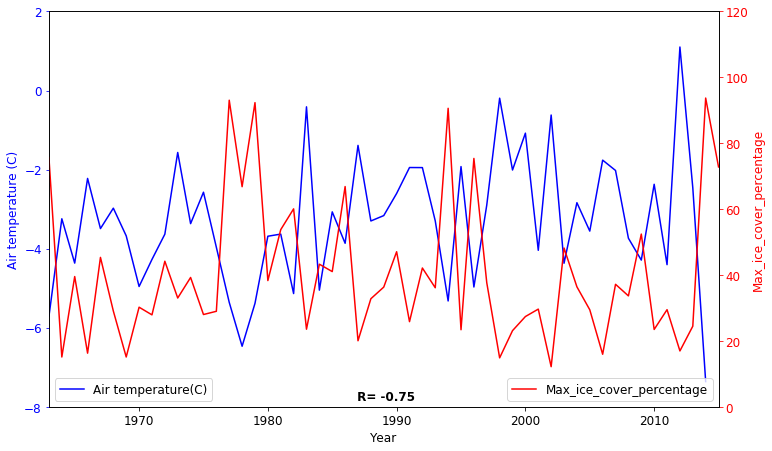

In [190]:
fig=plt.figure(figsize=(12,16))
ax=fig.add_subplot(2,1,1)
ax1 = ax.twinx()
temp.plot(fontsize=12,color='blue',ax=ax,legend=True,ylim=(-8,2))
IC.plot(color='red',fontsize=12,ax=ax1,legend=True,ylim=(0,120))
ax.set_ylabel('Air temperature (C)',fontsize=12,color='blue')
ax1.set_ylabel('Max_ice_cover_percentage',fontsize=12,color='red')
ax.set_xlabel('Year',fontsize=12)

ax.tick_params(axis='y', colors='blue')
ax1.tick_params(axis='y', colors='red')

ax.text(0.5, 0.01,' R= -0.75',\
        ha='center', va='bottom',fontsize=12,color='black',weight='bold', transform=ax.transAxes)

ax.legend(loc=3,fontsize=12)
ax1.legend(loc=4,fontsize=12)

# correlation between temp,snowfall and max ice coverage

In [194]:



IC['Max_ice_cover_percentage'].corr(temp['Air temperature(C)'],method='pearson')

-0.75182190690872108

In [195]:
snow.mean(axis=1).corr(IC['Max_ice_cover_percentage'])

0.3543611741387887

# snowfall over years

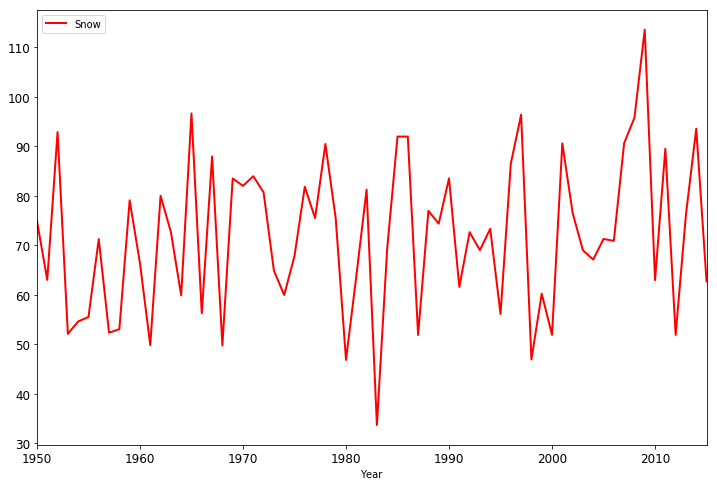

In [204]:
plt.figure(figsize=(12,8))
snow.mean(axis=1).plot(fontsize=12,label='Snow',lw=2,c='red')
plt.legend(loc=0)

# sst ,NAo, pdo

In [258]:
colms=['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

sst=pd.read_table('NAOPDOSST/sst.txt',sep='\s+')
sst.columns=colms
sst['Nov']=sst['Nov'].shift(1)
sst['Dec']=sst['Dec'].shift(1)
sst=sst[sst['Year']>1949]
sst=sst[['Year','Nov','Dec','Jan','Feb','Mar']].set_index('Year')
sst=sst.mean(axis=1)
sst.head()

Year
1950   -1.230
1951   -1.012
1952    0.432
1953   -0.010
1954    0.214
dtype: float64

In [260]:
pdo=pd.read_table('NAOPDOSST/pdo.txt',sep='\s+')
pdo.columns=colms
pdo['Nov']=pdo['Nov'].shift(1)
pdo['Dec']=pdo['Dec'].shift(1)
pdo=pdo[pdo['Year']>1949]
pdo=pdo[['Year','Nov','Dec','Jan','Feb','Mar']].set_index('Year')
pdo=pdo.mean(axis=1)
pdo.head()

Year
1950   -1.560
1951   -1.544
1952   -1.012
1953   -0.496
1954   -0.682
dtype: float64

In [261]:
nao=pd.read_table('NAOPDOSST/nao.txt',sep='\s+')
nao.columns=colms
nao['Nov']=nao['Nov'].shift(1)
nao['Dec']=nao['Dec'].shift(1)
nao=nao[nao['Year']>1949]
nao=nao[['Year','Nov','Dec','Jan','Feb','Mar']].set_index('Year')
nao=nao.mean(axis=1)
nao.head()

Year
1950    1.066
1951   -0.272
1952    0.300
1953   -0.010
1954    0.756
dtype: float64

In [263]:
osci=[]
osci.append(sst)
osci.append(pdo)
osci.append(nao)
osci=pd.concat(osci,axis=1)
osci.columns=['SST','PDO','NAO']
osci.head()

,SST,PDO,NAO
Year,,,
1950,-1.230,-1.560,1.066
1951,-1.012,-1.544,-0.272
1952,0.432,-1.012,0.300
1953,-0.010,-0.496,-0.010
1954,0.214,-0.682,0.756


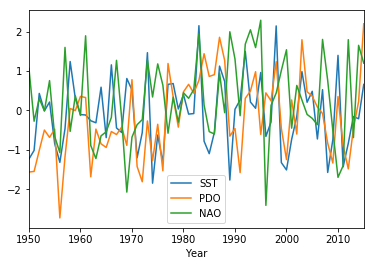

In [264]:
osci.plot()